In [35]:
import pandas as pd
import numpy as np

In [2]:
data_h1b=pd.read_csv('h1b_kaggle.csv')

In [3]:
data_h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
data_h1bs=data_h1b.sample(n=2000)

In [5]:
s=data_h1b.isnull()

In [6]:
data_h1b.count()

Unnamed: 0            3002458
CASE_STATUS           3002445
EMPLOYER_NAME         3002399
SOC_NAME              2984724
JOB_TITLE             3002415
FULL_TIME_POSITION    3002443
PREVAILING_WAGE       3002373
YEAR                  3002445
WORKSITE              3002458
lon                   2895216
lat                   2895216
dtype: int64

# 缺失数据处理

In [63]:
frame=pd.DataFrame({'序号':[1,2,3,4],'姓名':['张三','李四','李磊','韩梅'],'成绩':['B','C','A','A'],'年龄':[20,21,25,None],'身高':[175,None,None,None]})

使用isnull()函数可以直观的看到每一项是否有缺失，不过如果数据量太大，我们很难找到哪些数据有缺失。

In [8]:
frame.isnull()

,序号,姓名,成绩,年龄,身高
0,False,False,False,False,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,True,True


在这个假设的数据集中我们要怎么操作呢？首先我我们可以统计每个特征或者每条记录缺失数据的分布情况。

In [9]:
print(frame.isnull().sum(axis=0)) #纵向统计有多少缺失数据
print(frame.isnull().sum(axis=1)) #横向统计有多少缺失数据

序号    0
姓名    0
成绩    0
年龄    1
身高    3
dtype: int64
0    0
1    1
2    1
3    2
dtype: int64


In [12]:
frame 

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0
1   2  李四  C  21.0    NaN
2   3  李磊  A  25.0    NaN
3   4  韩梅  A   NaN    NaN


从获取的信息中可以看出，在年龄这个特征中有1个缺失数据，在身高特征有3个缺失数据。在第2，3条记录分别有一个缺失数据，第4条有两个缺失数据。我们可以简单的删除这些有缺失数据的项，操作及结果如下。

In [13]:
frame_dropall=frame.dropna() #删除所有有缺失数据的记录
frame

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0


可以看到dropna函数把所有的含有缺失数据的记录都删除了。不过很可能经过缺失数据删除后的数据集规模太小而无法使用，在这种情况下我们可以通过对缺失数据填补和删除特征来保持数据集规模。

首先是年龄特征，我们经过对表的简单分析，可以看出这是一个学生成绩的表，所以学生的年龄应该差不多，我们可以用平均值来填补。

In [46]:
frame2=frame.fillna({'年龄':frame['年龄'].mean()}) #填充年龄的平均值

fillna函数中的值可以是字典，它可以对某一列或者某几列的缺失数据进行操作。

In [48]:
frame2

,序号,姓名,成绩,年龄,身高
0,1,张三,B,20.0,175.0
1,2,李四,C,21.0,NaN
2,3,李磊,A,25.0,NaN
3,4,韩梅,A,22.0,NaN


这里我们就把年龄的缺失数据填上了，那么对于身高呢？经过观察可以发现，身高的缺失数据非常多，占到所有数据的75%。我们当然可以按照平均值来填补数据，但是会造成身高这一项失去特征表达的作用，因为所有项目都一样，因此我们可以删除这一列。这样可以尽可能的保留数据集中的数据。

In [49]:
frame2.dropna(axis=1)  #按照列删除缺失数据，这里参数axis表达删除的方向，0表示按行删除，1表示按列删除。删除的是有缺失数据的一整行或列。

,序号,姓名,成绩,年龄
0,1,张三,B,20.0
1,2,李四,C,21.0
2,3,李磊,A,25.0
3,4,韩梅,A,22.0


下面列出之前使用的dropna和fillna的所有用法。

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

### dropna

| 参数 | 用法|
| :- | :- |
|axis|控制移除缺失数据的行或者列。有两个参数{0 或者 'index',1 或者 'columns'}，如果输入是0或者'index'则移除缺失数据的行（记录），如果输入是1或者'columns'就移除有缺失数据的列。默认是0。|
|how|决定空缺数据移除出数据集的方式。有两个参数{'any','all'},如果输入是'any'只要这一行（列）有缺失数据，就移除这一行（列）。如果输入是'all'则只有在这一行（列）数据全部缺失后才移除。
|tresh|控制每行（列）留下的非缺失数据个数。输入一个int型整数。
|subset|控制从哪一行（列）寻找缺失数据。输入一个列表。如果想删除有缺失数据的行，就读入特征名作为列表里的值。
|inplace|控制操作是直接作用在数据集上还是副本上。有两个参数{True，False},如果输入是True则在原始数据集上直接操作，返回None。如果是False则在生成的副本上操作，返回操作完成的副本。

下面对之前没有提到的操作进行举例说明，方便理解。

In [59]:
frame_thr=frame.dropna(thresh=4) #控制有效值超过4个的数据记录保留
print(frame_thr)

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0
1   2  李四  C  21.0    NaN
2   3  李磊  A  25.0    NaN


In [60]:
frame_sub=frame.dropna(subset=['年龄']) #加入subset参数表示只观察年龄特征的参数，而不管其他特征是否有缺失数据
print(frame_sub)

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0
1   2  李四  C  21.0    NaN
2   3  李磊  A  25.0    NaN


In [62]:
frame_in=frame.dropna(inplace=True) #可以看到inplace为True时函数直接在原始数据集上进行了操作，返回值是None
print(frame)
print(frame_in)

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0
None


### fillna
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)

|参数|用法|
|:--:|:--:|
|value|需要填补的数据。允许读入的数据类型有标量数据、字典、序列和数据集。字典，序列和数据集可以指定需要填充数据的标签|
|method|可以控制填充的方式。有5个参数{'backfill','bfill','pad','ffill',None},默认为None。
backfill/bfill:用下一个非缺失数据区填充该数据，pad/fill:用前一个非缺失数据去填充该数据。None表示用制定的数据填充该缺失数据。
|axis|控制操作方向。有两个参数{0 或者 'index',1 或者 'columns'}，默认为0。输入0表示按照行操作，1表示按照列操作。
|implace|控制操作是直接作用在数据集上还是副本上。有两个参数{True，False},如果输入是True则在原始数据集上直接操作，返回None。如果是False则在生成的副本上操作，返回操作完成的副本。
|limit| 控制沿轴填充缺失数据的最大个数。输入一个int型整数，默认为None。
|downcast| 控制是否进行类型转换。输入一个字典{'对象':'数据类型'}。

# 重复数据处理

In [3]:
frame=pd.DataFrame({'序号':[1,2,3,4,1],'姓名':['张三','李四','李磊','韩梅','张三'],'成绩':['B','C','A','A','B'],'年龄':[20,21,25,None,20],'身高':[175,None,None,None,175]})

在原始数据集的基础上，增加一列新的数据，来讲解如何使用pandas包来处理重复数据。

In [84]:
print(frame)

   序号  姓名 成绩    年龄     身高
0   1  张三  B    20  175.0
1   2  李四  C    21    NaN
2   3  李磊  A    25    NaN
3   4  韩梅  A  None    NaN
4   1  张三  B    20  175.0


In [90]:
print(frame.duplicated()) #查看是否有重复记录，只有所有特征都一样时判断为相同。

0    False
1    False
2    False
3    False
4     True
dtype: bool


In [89]:
print(frame.drop_duplicates()) #删除重复记录，默认保存第一个

   序号  姓名 成绩    年龄     身高
0   1  张三  B  20.0  175.0
1   2  李四  C  21.0    NaN
2   3  李磊  A  25.0    NaN
3   4  韩梅  A   NaN    NaN


下面给出duplicated()和drop_duplicateds()的全部参数定义

### duplicated()
DataFrame.duplicated(subset=None, keep='first')

|参数|用法|
|:-:|:-:|
|subset|控制选择特定的特征判断重复。读入一个或一个序列的特征标签名。
|keep|判断重复的记录的位置。有三个参数{'first','last',False},默认为first。如果输入为'first'，则除了第一出现的记录以外的其他记录都标记为重复（True）。如果输入为'last'则除了最后一个出现的记录以外的其他记录都标记为重复（True）。如果输入为False，则所有重复记录都标记为True。

In [105]:
l=['序号','姓名']

In [106]:
l

['序号', '姓名']

In [112]:
print(frame.duplicated(subset=l)) #记录仅有序号和姓名重复的记录

0    False
1    False
2    False
3    False
4     True
dtype: bool


In [113]:
print(frame.duplicated(keep='last'))

0     True
1    False
2    False
3    False
4    False
dtype: bool


### drop_duplicated()
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)

|参数|用法|
|:-:|:-:|
|subset| 控制选择特定的特征判断重复。读入一个或一个序列的特征标签名。
|keep| 判断重复的记录的位置。有三个参数{'first','last',False},默认为first。如果输入为'first'，则删除除了第一出现的记录以外的其他记录。如果输入为'last'则删除除了最后一个出现的记录以外的其他记录。如果输入为False，则删除所有重复记录。
|inplace|控制操作是直接作用在数据集上还是副本上。有两个参数{True，False},如果输入是True则在原始数据集上直接操作，返回None。如果是False则在生成的副本上操作，返回操作完成的副本。

操作与duplicated类似，所以不做详细举例。

# 离群值处理

离群值检测的方法有很多，下面介绍两种。

1、3$\sigma$
- 如可以假设一元数据服从正态分布， $\mu$为正态均值，$\sigma$为正态标准差，则在($\mu$-3$\sigma$,$\mu$+3$\sigma$)的区间内包含99.97%的值。我们将距离均值超过3$\sigma$的数据点都当做离群值处理。

2、箱图
- 我们还可以用一种叫做箱图的方法来检测离群值的方法。箱图是一种比较流行的观察离群值的方法，它可以直观的展示出数据的最大非离群点值，最小非离群点值，中位数，和第一、第三四分位数。其中第一四分位数可以用Q1表示,第三四分位数可以用Q3表示。中间四分位数极差用IQR表示，定义为Q3-Q1。最大非离群点值为小于Q3+1.5×IQR的最大值，最小非离群点为大于Q1-1.5×IQR的最小值。在(Q1-1.5×IQR,Q3+1.5×IQR)的区间内包含了99.3%的值，我们可以将区间之外的值当做是离群点。下图展示了一个简单的箱图说明。

下面我们会使用一个简单的例子来说明如何观察箱图和如何在python中制作箱图，并用箱图来排除离群点。

首先我们可以生成100个随机数，再调用matplotlib 中绘制箱图的函数就可以轻松的绘制出简单的箱图。

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [70]:
rand_data=np.random.randn(100) #生成100个随机数
plt.boxplot(rand_data) #产生图片
plt.show() #输出图片

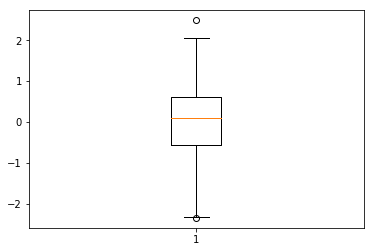

In [72]:
import matplotlib.pyplot as plt
import numpy as np
#生成100个随机数
rand_data=np.random.randn(100) 
#产生图片
plt.boxplot(rand_data) 
#输出图片
plt.show() 

我们绘制出了箱图，从图中可以看出有两个离群值，所以我们需要对这两个离群值进行处理。对离群值我们可以把他们当做缺失值，根据具体情况用均值、最接近值等来填补。这里我们直接删除这条数据。下面是离群值筛选代码。

In [94]:
import matplotlib.pyplot as plt
import numpy as np
rand_data=np.random.randn(100) #生成100个随机数
#取第一四分位点Q1
Q1 = np.percentile(rand_data, 25)
#取第3四分位点Q3
Q3 = np.percentile(rand_data, 75)
#计算中间四分位数极差IQR
IQR = Q3-Q1
#使用布尔值索引，得到所有离群值数据
data_OutLier = rand_data[(rand_data<Q1-1.5*IQR)|(rand_data>Q3+1.5*IQR)]
#室友布尔值索引，得到所有有效值数据
data_Processed =rand_data[(rand_data>Q1-1.5*IQR)&(rand_data<Q3+1.5*IQR)]

#输出数据检测长度是否正确
print('随机数据长度:',len(rand_data))
print('离群值长度:',len(data_OutLier))
print('有效值长度:',len(data_Processed))

离群值长度: 2
有效值长度: 98
随机数据长度: 100


# 噪声处理

这里我们介绍对噪声进行分箱处理的方法。分箱在前面章节中介绍过2种分箱方法：等频，等宽。3种对箱内数据处理的方法：分别是取箱中位数、取箱中位数和按箱边界。下面的代码部分将分别展示各种分箱方法和箱内数据处理方法。代码实现比较基础，有改进空间，读者可以自行探索。

- 等频分箱
等频分箱是将数据按一定顺序排序后，每个箱中放入数量相等的数据。

In [222]:
import numpy as np
np.random.seed(8)
#首先生成30个随机整数
rand_Noise=np.random.randint(15, size =30 ) 
print('原始随机数据:',rand_Noise)
#对数据进行排序
rand_NoiseSorted=np.sort(rand_Noise)
print('排序数据:',rand_NoiseSorted)
#假设分5个箱，可以用numpy自带的切片操作来进行等频分箱
box_list=[]
for i in range(5):
    #data[x:y]的索引代表着在data在[x,y)的索引区间内的值
    #如data[0,6]代表着data[0]到data[5]总共6个值
    box_list.append(rand_NoiseSorted[6*i:6*i+6])
#打印所有分箱情况
for i in range(5):
    print('箱%d:'%(i+1),box_list[i])

原始随机数据: [ 3  4  1  9  5 10  8  3  8  0 13  5 12  1  3 10 11 12 13  9 13 13  2 11
  2 14  6 13  8  9]
排序数据: [ 0  1  1  2  2  3  3  3  4  5  5  6  8  8  8  9  9  9 10 10 11 11 12 12
 13 13 13 13 13 14]
箱1: [0 1 1 2 2 3]
箱2: [3 3 4 5 5 6]
箱3: [8 8 8 9 9 9]
箱4: [10 10 11 11 12 12]
箱5: [13 13 13 13 13 14]


- 等宽分箱
等宽分箱是将变量的取值范围分成等宽的区间，每个区间视为一个分箱。

In [195]:
import numpy as np
import pandas as pd
#设置分箱个数
cut=5
#使用pandas 的cut 功能进行分箱，cut数是所分箱的个数，返回一个pandas.categorical类型的指
colBin = pd.cut(rand_Noise,cut)
#初始化分箱，每个分箱由一个列表存储
box_list=[]
for i in range(cut):
    box_list.append([])
#按分好的categorical把数据放入箱中
for i,j in zip(rand_Noise,colBin.codes):
    box_list[j].append(i)
#打印所有分箱情况
for i in range (len(box_list)):
    print ('箱%d:'%(i+1),box_list[i])

箱1: [1, 0, 1, 2, 2]
箱2: [3, 4, 5, 3, 5, 3]
箱3: [8, 8, 6, 8]
箱4: [9, 10, 10, 11, 9, 11, 9]
箱5: [13, 12, 12, 13, 13, 13, 14, 13]


上面介绍了等频和等宽的分箱方法，使用pandas和numpy库就可以十分轻松的实现。下面以等宽分箱的数据为例介绍如何光滑箱内数据。

- 箱中位数

In [173]:
from copy import deepcopy

In [227]:
#数据展示
print('原始数据：')
for i in range (len(box_list)):
    print ('箱%d:'%(i+1),box_list[i])
#初始化箱
box_MedianSmooth=[]
#对每个箱进行遍历
for i in range(len(box_list)):
    #新建一个箱
    box_MedianSmooth.append([])
    #算出中位数
    mid = np.median(box_list[i])
    #将箱内每个数以中位数替换
    for j in range(len(box_list[i])):
        #使用浮点型防止有数组个数为偶数时可能造成的误差
        box_MedianSmooth[i].append(mid)
print('光滑后数据')
for i in range (len(box_list)):
    print ('箱%d:'%(i+1),box_MedianSmooth[i])

原始数据：
箱1: [0 1 1 2 2 3]
箱2: [3 3 4 5 5 6]
箱3: [8 8 8 9 9 9]
箱4: [10 10 11 11 12 12]
箱5: [13 13 13 13 13 14]
光滑后数据
箱1: [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
箱2: [4.5, 4.5, 4.5, 4.5, 4.5, 4.5]
箱3: [8.5, 8.5, 8.5, 8.5, 8.5, 8.5]
箱4: [11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
箱5: [13.0, 13.0, 13.0, 13.0, 13.0, 13.0]


- 箱平均数

箱平均数与箱中位数同理，只需要将求中位数的函数换为求平均数的函数即可。numpy中求平均数的函数为numpy.mean()。

- 箱边界

箱边界需要对箱内数据和箱边界的距离进行判断，将数据光滑为更接近的那个边界，代码如下。

In [232]:
#数据展示
print('原始数据：')
for i in range (len(box_list)):
    print ('箱%d:'%(i+1),box_list[i])
#初始化箱
box_EdgeSmooth=[]
for i in range(len(box_list)):
    #新建一个箱
    box_EdgeSmooth.append([])
    boxMax=np.max(box_list[i])
    boxMin=np.min(box_list[i])
    for j in range(len(box_list[i])):
        if (box_list[i][j]-boxMin)>(boxMax-box_list[i][j]):
            box_EdgeSmooth[i].append(boxMax)
        else:
            box_EdgeSmooth[i].append(boxMin)
print('光滑后数据')
for i in range (len(box_list)):
    print ('箱%d:'%(i+1),box_EdgeSmooth[i])

原始数据：
箱1: [0 1 1 2 2 3]
箱2: [3 3 4 5 5 6]
箱3: [8 8 8 9 9 9]
箱4: [10 10 11 11 12 12]
箱5: [13 13 13 13 13 14]
光滑后数据
箱1: [0, 0, 0, 3, 3, 3]
箱2: [3, 3, 3, 6, 6, 6]
箱3: [8, 8, 8, 9, 9, 9]
箱4: [10, 10, 10, 10, 12, 12]
箱5: [13, 13, 13, 13, 13, 14]


# 数据标准化

在这节内我们可以调用sklearn库来快速的进行标准化处理。

- 比例调节
>$$
x'=\frac{x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}
$$
- Z-score 标准化
>$$
x'=\frac{x-{\text{mean}}(x)}{\sigma}
$$


- 0,1标准化又称离差标准化,作用是将数据集内的所有数据缩放到[0,1]的范围之内。
- Z-Score标准化，作用是将数据集转化为均值为0，标准差为1的标准正态分布数据。但如果原始数据和标准正态分布相差很远，那么结果可能会非常糟糕。

代码如下。

0-1标准化

In [279]:
from sklearn import preprocessing
data_Standardization=np.random.randint(50,size=(5,5))
#使用预处理中的MinMaxScaler生成一个标准化对象
min_max_scaler = preprocessing.MinMaxScaler()
#调用这个对象对数据进行标准化操作
data_scaled = min_max_scaler.fit_transform(data_Standardization)
print('原始数据：')
print(data_Standardization)
print('0-1标准化后数据')
print(data_scaled)

原始数据：
[[ 7 45 19 40 40]
 [46 34 38  5 10]
 [39 22 22  9 27]
 [40 49  2 26 30]
 [ 2 11  7  1 24]]
0-1标准化后数据
[[0.11363636 0.89473684 0.47222222 1.         1.        ]
 [1.         0.60526316 1.         0.1025641  0.        ]
 [0.84090909 0.28947368 0.55555556 0.20512821 0.56666667]
 [0.86363636 1.         0.         0.64102564 0.66666667]
 [0.         0.         0.13888889 0.         0.46666667]]


D:\soft\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Z-score标准化

In [280]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data_Standardization)
print('原始数据：')
print(data_Standardization)
print('Z-score标准化后数据')
print(data_scaled)
print('特征均值')
print(data_scaled.mean(axis=0))
print('特征方差')
print(data_scaled.std(axis=0))

原始数据：
[[ 7 45 19 40 40]
 [46 34 38  5 10]
 [39 22 22  9 27]
 [40 49  2 26 30]
 [ 2 11  7  1 24]]
Z-score标准化后数据
[[-1.07418496  0.9038322   0.11115313  1.62632665  1.41914037]
 [ 1.0416339   0.1271014   1.61965985 -0.76533019 -1.66594739]
 [ 0.66187154 -0.72024128  0.3493384  -0.49199798  0.08226901]
 [ 0.7161233   1.18627976 -1.23856342  0.66966391  0.39077778]
 [-1.34544378 -1.49697208 -0.84158796 -1.0386624  -0.22623977]]
特征均值
[-4.44089210e-17 -1.77635684e-16 -1.55431223e-16  4.44089210e-17
  7.21644966e-17]
特征方差
[1. 1. 1. 1. 1.]


D:\soft\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


可以看到均值非常接近0，方差为1

这里需要注意的是，如果输入矩阵，sklearn的预处理操作默认是对列进行的，这也刚好是我们需要的——我们通常是对特征进行标准化处理，而每个特征在数据集中的表现就是列。

# 独热编码

独热码的实现和标准化比较类似，可以使用pandas自带的get_dummies函数来实现。

In [321]:
frame=pd.DataFrame({'年级':['大一','大二','大三'],'学生数':[100,200,300]})

In [322]:
pd.get_dummies(frame)

,学生数,年级_大一,年级_大三,年级_大二
0,100,1,0,0
1,200,0,0,1
2,300,0,1,0


可以看到已经转换成功，数据适合输入skleanr等模型进行后一步计算。